<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/21_RNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv("NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [21]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format if needed
df.set_index('Date', inplace=True)

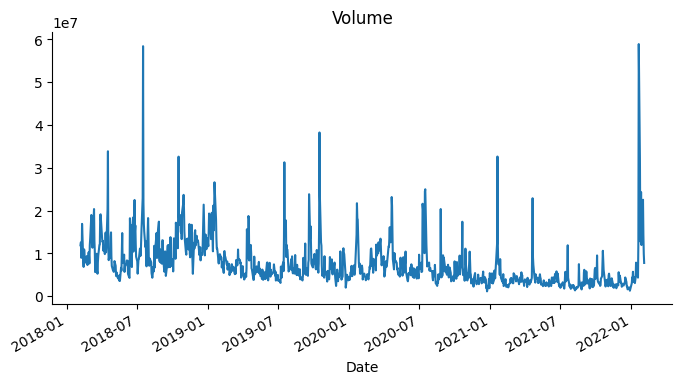

In [22]:
from matplotlib import pyplot as plt
df['Volume'].plot(kind='line', figsize=(8, 4), title='Volume')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


The `seasonal_decompose` function is part of the `statsmodels` library in Python and is used for decomposing time series data into its constituent components, namely trend, seasonal, and residual (or irregular) components. This decomposition helps in understanding the underlying patterns and structures within a time series, which can be useful for analysis, visualization, and forecasting tasks.

Here's an overview of how `seasonal_decompose` works:

1. **Input:**
   - The input to `seasonal_decompose` is typically a time series data series, such as stock prices, sales data, temperature readings, etc.
   - The input data should have a temporal ordering (i.e., sorted by time) for accurate decomposition.

2. **Decomposition Components:**
   - Trend: Represents the long-term movement or direction of the data.
   - Seasonal: Captures periodic patterns or cycles that repeat at fixed intervals (e.g., daily, monthly, yearly).
   - Residual (Irregular): Accounts for random fluctuations or noise in the data that cannot be attributed to the trend or seasonal components.

3. **Parameters:**
   - `x`: Input time series data.
   - `model`: Specifies the decomposition model. Common choices include 'additive' (default) and 'multiplicative' depending on the nature of the data.
   - `filt`: Applies a filter to the data before decomposition (optional).
   - `freq`: Specifies the frequency of the seasonal component. If not provided, it's inferred from the data.
   - `extrapolate_trend`: Determines whether to extrapolate the trend beyond the observed data (default is False).

4. **Usage:**
   ```python
   from statsmodels.tsa.seasonal import seasonal_decompose

   # Assuming 'data' is your time series data
   result = seasonal_decompose(data, model='additive', period=12)
   ```

5. **Accessing Components:**
   - Once you run `seasonal_decompose`, you can access the individual components (trend, seasonal, residual) using the `result` object.
   - For example, `result.trend` gives you the trend component, `result.seasonal` gives the seasonal component, and `result.resid` gives the residual component.

6. **Plotting:**
   - You can visualize the decomposed components using `result.plot()` to generate a plot with subplots for each component.

Here's a basic example of how to use `seasonal_decompose`:

```python
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'data' is your time series data
result = seasonal_decompose(data, model='additive', period=12)

# Plot the decomposed components
result.plot()
plt.show()
```

Adjust the parameters (`model`, `period`, etc.) based on your specific data and analysis requirements.

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
result = seasonal_decompose(df['Volume'], period=12)

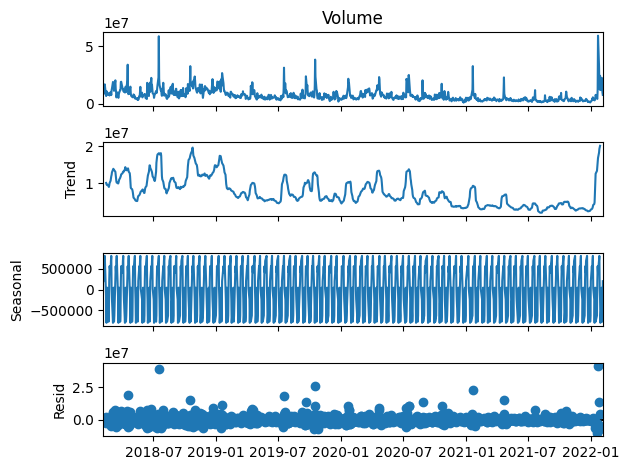

In [31]:
result.plot();

In [32]:
len(df)

1009

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
split_index = int(len(df) * 0.8)  # split index for an 80-20 split
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Print the shapes of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (807, 6)
Testing set shape: (202, 6)


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

The `TimeseriesGenerator` is a utility in Keras (part of TensorFlow) that helps in creating batches of temporal data for time series forecasting or sequence prediction tasks. It generates samples and corresponding targets for training a model using sliding windows of time series data.

Here's an overview of how `TimeseriesGenerator` works:

1. **Input Data:**
   - Input data for `TimeseriesGenerator` should be a 1D or 2D array representing your time series data.
   - If your data is 1D (e.g., a single time series), it should be shaped as `(n_samples,)`.
   - If your data is 2D (e.g., multiple time series or features), it should be shaped as `(n_samples, n_features)`.

2. **Parameters:**
   - `length`: Number of time steps in the input sequences (window size).
   - `sampling_rate`: Stride between consecutive input sequences. Default is 1.
   - `batch_size`: Number of samples in each batch.
   - `stride`: Number of time steps to move the sliding window forward between batches. Default is 1.
   - `start_index`, `end_index`: Optional parameters to specify the start and end indices of the data to use.
   - `shuffle`: Whether to shuffle the samples.
   - `reverse`: Whether to reverse the order of samples.
   - `batch_shape`: Shape of each batch, useful when dealing with 2D input data.

3. **Usage:**
   ```python
   from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

   # Assuming data is your 1D or 2D input data
   data_generator = TimeseriesGenerator(data, targets, length=..., batch_size=..., ...)
   ```

4. **Generated Batches:**
   - Each batch generated by `TimeseriesGenerator` consists of input sequences (X) and corresponding targets (y).
   - The input sequence X at each time step contains 'length' time steps from the original data.
   - The target y is typically the next time step(s) after the input sequence.

5. **Example Usage:**
   ```python
   data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Example 1D time series data
   targets = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]  # Example targets for forecasting

   data_generator = TimeseriesGenerator(data, targets, length=3, batch_size=1)
   for i in range(len(data_generator)):
       X, y = data_generator[i]
       print(f"Batch {i}: Input = {X}, Target = {y}")
   ```

In this example, `TimeseriesGenerator` creates batches of size 1 with input sequences of length 3 (`length=3`) from the data and corresponding targets for time series forecasting. Adjust the parameters based on your specific data and modeling requirements.

In [38]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [40]:
scaled_train

array([[0.08056696, 0.05034439, 0.05542943, 0.05782213, 0.05782213,
        0.18775582],
       [0.03953748, 0.04684222, 0.04059912, 0.09033648, 0.09033648,
        0.19997416],
       [0.09370782, 0.06362368, 0.09759114, 0.08704531, 0.08704531,
        0.13686036],
       ...,
       [0.90844394, 0.87943614, 0.90892469, 0.88707925, 0.88707925,
        0.03606129],
       [0.89800021, 0.89245279, 0.92667396, 0.90949321, 0.90949321,
        0.05491353],
       [0.91957643, 0.9132326 , 0.92894409, 0.89567605, 0.89567605,
        0.17660618]])

In [42]:
n_input = 3
n_features=6
generator = TimeseriesGenerator(scaled_train,scaled_train, length=n_input, batch_size=1)

In [44]:
x,y=generator[0]
print(f'Given the Array: \n{x.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.08056696 0.05034439 0.05542943 0.05782213 0.05782213 0.18775582
 0.03953748 0.04684222 0.04059912 0.09033648 0.09033648 0.19997416
 0.09370782 0.06362368 0.09759114 0.08704531 0.08704531 0.13686036]
Predict this y: 
[[0.09514242 0.04952721 0.05534099 0.04601941 0.04601941 0.14253908]]


In [45]:
x.shape

(1, 3, 6)

- The first dimension (1) represents one sample.
- The second dimension (3) represents three time steps (or features) per sample.
- The third dimension (6) represents six elements per time step (or feature).

In [43]:
print(len(scaled_train),len(generator))


807 804


In [47]:
# Did this part to figure out why Scaled-train and generator are not of same size but can't figure out. :(


# Parameters for the generator
n_input = 3  # Number of time steps per batch
batch_size = 1  # Batch size set to 1

# Create the generator
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=batch_size)

# Length of scaled_train and generator
print(f'Length of scaled_train: {len(scaled_train)}')
print(f'Length of generator: {len(generator)}')

# Debugging: Print batches from the generator
for i in range(len(generator)):
    x, y = generator[i]
    print(f'Batch {i}: Input = {x}, Target = {y}')


Length of scaled_train: 807
Length of generator: 804
Batch 0: Input = [[[0.08056696 0.05034439 0.05542943 0.05782213 0.05782213 0.18775582]
  [0.03953748 0.04684222 0.04059912 0.09033648 0.09033648 0.19997416]
  [0.09370782 0.06362368 0.09759114 0.08704531 0.08704531 0.13686036]]], Target = [[0.09514242 0.04952721 0.05534099 0.04601941 0.04601941 0.14253908]]
Batch 1: Input = [[[0.03953748 0.04684222 0.04059912 0.09033648 0.09033648 0.19997416]
  [0.09370782 0.06362368 0.09759114 0.08704531 0.08704531 0.13686036]
  [0.09514242 0.04952721 0.05534099 0.04601941 0.04601941 0.14253908]]], Target = [[0.05718305 0.01503038 0.01438808 0.04423196 0.04423196 0.27525565]]
Batch 2: Input = [[[0.09370782 0.06362368 0.09759114 0.08704531 0.08704531 0.13686036]
  [0.09514242 0.04952721 0.05534099 0.04601941 0.04601941 0.14253908]
  [0.05718305 0.01503038 0.01438808 0.04423196 0.04423196 0.27525565]]], Target = [[0.05227671 0.02480738 0.05239261 0.06829145 0.06829145 0.12906172]]
Batch 3: Input = [[[

In [48]:
# Now we will make a generator for timesteps of 12 months

n_input=12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [51]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [69]:
model = Sequential()
model.add(SimpleRNN(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(6))
model.compile(optimizer='adam',loss='mse')


In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100)               10700     
                                                                 
 dense_5 (Dense)             (None, 6)                 606       
                                                                 
Total params: 11306 (44.16 KB)
Trainable params: 11306 (44.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.fit(generator,epochs=20)

Epoch 1/20
795/795 [==============================] - 3s 3ms/step - loss: 0.0038
Epoch 2/20
795/795 [==============================] - 2s 2ms/step - loss: 0.0020
Epoch 3/20
795/795 [==============================] - 2s 2ms/step - loss: 0.0017
Epoch 4/20
795/795 [==============================] - 2s 2ms/step - loss: 0.0017
Epoch 5/20
795/795 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 6/20
795/795 [==============================] - 3s 4ms/step - loss: 0.0016
Epoch 7/20
795/795 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 8/20
795/795 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 9/20
795/795 [==============================] - 2s 2ms/step - loss: 0.0015
Epoch 10/20
795/795 [==============================] - 2s 2ms/step - loss: 0.0014
Epoch 11/20
795/795 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 12/20
795/795 [==============================] - 2s 2ms/step - loss: 0.0015
Epoch 13/20
795/795 [====

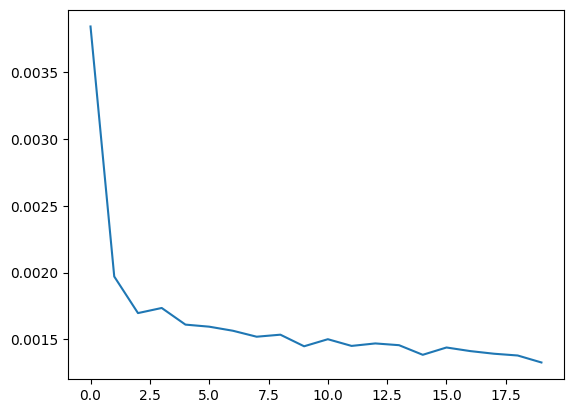

In [72]:
losss = model.history.history['loss']
plt.plot(range(len(losss)),losss)

In [73]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape(1, n_input,n_features)
model.predict(last_train_batch)

1/1 [==============================] - 0s 116ms/step


array([[0.9139329 , 0.9141018 , 0.9229207 , 0.91838026, 0.91321903,
        0.12149188]], dtype=float32)

In [75]:
scaled_test[0]

array([0.78638852, 0.77285209, 0.80304858, 0.78028704, 0.78028704,
       0.37986324])

In [76]:
test_predictions = []
first_eval_batch=scaled_train[-n_input:]
current_batch = first_eval_batch.reshape(1,n_input,n_features)

for i in range(len(test)):
  # Get prediction value for the first batch
  current_pred = model.predict(current_batch)[0]

  # Append the prediction into the array
  test_predictions.append(current_pred)

  # Use the prediction to update the batch & remove first value
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 16ms/step


In [77]:
test_predictions

[array([0.9139329 , 0.9141018 , 0.9229207 , 0.91838026, 0.91321903,
        0.12149188], dtype=float32),
 array([0.92939174, 0.9243915 , 0.9404254 , 0.92794466, 0.92193   ,
        0.06132716], dtype=float32),
 array([0.93423986, 0.9307807 , 0.9589113 , 0.93616533, 0.94452137,
        0.02240124], dtype=float32),
 array([0.9492213 , 0.9493519 , 0.97415936, 0.9528643 , 0.95686424,
        0.00106911], dtype=float32),
 array([ 0.96332794,  0.9623946 ,  0.9907365 ,  0.96866286,  0.97149247,
        -0.02349989], dtype=float32),
 array([ 0.982251  ,  0.9815117 ,  1.0130018 ,  0.9880837 ,  0.9923919 ,
        -0.04176617], dtype=float32),
 array([ 1.0029676 ,  1.0043285 ,  1.0365999 ,  1.0089828 ,  1.015586  ,
        -0.05380864], dtype=float32),
 array([ 1.0257651,  1.0283304,  1.0616858,  1.0316498,  1.039788 ,
        -0.0638409], dtype=float32),
 array([ 1.050658 ,  1.0540088,  1.0883833,  1.0563095,  1.0659294,
        -0.0727109], dtype=float32),
 array([ 1.0773253 ,  1.0813121 ,  1.

In [80]:
true_prediction = scaler.inverse_transform(test_predictions)

In [81]:
test['Prediction'] = true_prediction

ValueError: Expected a 1D array, got an array with shape (202, 6)

In [83]:
predicted_df = pd.DataFrame(true_prediction, columns=['dopen', 'dhigh', 'dlow', 'dclose', 'dadjclos', 'dvolumw'])

combined_df = pd.concat([test, predicted_df], axis=1)
combined_df.head()

,Open,High,Low,Close,Adj Close,Volume,dopen,dhigh,dlow,dclose,dadjclos,dvolumw
2021-04-21 00:00:00,508.000000,515.460022,503.600006,508.899994,508.899994,22897400.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-22 00:00:00,513.820007,513.960022,500.549988,508.779999,508.779999,9061100.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-23 00:00:00,509.010010,509.700012,500.700012,505.549988,505.549988,7307700.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-26 00:00:00,506.760010,510.480011,503.000000,510.299988,510.299988,4388800.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-27 00:00:00,512.619995,512.989990,504.579987,505.549988,505.549988,3761300.0,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
import pandas as pd
import numpy as np

# Assuming predictions is the array of predicted values from your model
# Shape of predictions should be (202, 6) based on your description

# Convert predictions array to a DataFrame with appropriate column names
predicted_df = pd.DataFrame(true_prediction, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6'])

# Assuming original_test_df is your original test dataset with 202 rows and 6 features
# Convert original_test_df to a DataFrame if it's not already a DataFrame
original_test_df = pd.DataFrame(test)

# Check for NaN values in predictions
if np.isnan(true_prediction).any():
    print("NaN values found in predictions. Check your model or data preprocessing.")

# Check the shapes of original_test_df and predicted_df
if original_test_df.shape != (202, 6) or predicted_df.shape != (202, 6):
    print("Shapes of original_test_df and/or predicted_df are not as expected.")

# Concatenate original test dataset DataFrame with predicted values DataFrame
combined_df = pd.concat([original_test_df.reset_index(drop=True), predicted_df.reset_index(drop=True)], axis=1)

# Optionally, if you scaled your data before training the model, you may want to inverse transform the predicted values to their original scale
# Assuming scaler is your scaler object used for scaling the data
# inverse_transform_predictions = scaler.inverse_transform(predictions)

# Print or visualize the combined DataFrame to compare original vs. predicted values
print(combined_df)


           Open        High         Low       Close   Adj Close    Volume  \
0    508.000000  515.460022  503.600006  508.899994  508.899994  22897400   
1    513.820007  513.960022  500.549988  508.779999  508.779999   9061100   
2    509.010010  509.700012  500.700012  505.549988  505.549988   7307700   
3    506.760010  510.480011  503.000000  510.299988  510.299988   4388800   
4    512.619995  512.989990  504.579987  505.549988  505.549988   3761300   
..          ...         ...         ...         ...         ...       ...   
197  401.970001  427.700012  398.200012  427.140015  427.140015  20047500   
198  432.959991  458.480011  425.540009  457.130005  457.130005  22542300   
199  448.250000  451.980011  426.480011  429.480011  429.480011  14346000   
200  421.440002  429.260010  404.279999  405.600006  405.600006   9905200   
201  407.309998  412.769989  396.640015  410.170013  410.170013   7782400   

          Feature1       Feature2       Feature3       Feature4  \
0       

In [87]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(combined_df['Volume'],combined_df['Feature6']))
print(rmse)

1764030164.1715934
